# Project Code
#### Joey Livorno | gil15@pitt.edu | 3.16.2020 | EXISTING

## Table of Contents
- **[Introduction](#Introduction)**
- **[Basic Data Processing](#Basic-Data-Processing)**
    - [Trump Tweets](#Trump-Tweets)
    - [All Tweets](#All-Tweets)
- **[Exploratory Data Analysis](#Exploratory-Data-Analysis)**
- **[Linguistic Analysis](#Linguistic-Analysis)**
- **[Machine Learning](#Machine-Learning)**
    - [Trump or Not Trump](#Trump-or-Not-Trump)
    - [Predicting Sentiment](#Predicting-Sentiment)
- **[Conclusion](#Conclusion)**

## Introduction

The purpose of this project is to process the contents of Donald Trump's Twitter feed and make linguistic and statistical discoveries based on the data, specifically using sentiment analysis. In the second part of the project, we will build a machine learning model that will predict whether or not a tweet was composed by Donald Trump.

These are the required libraries for this assignment:

In [1]:
#import libraries
import numpy as np
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from textblob import TextBlob as tb ##TextBlob object will allow for quick sentiment analysis

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import matplotlib
import matplotlib.pyplot as plt
imgdir = "../images/"

## Basic Data Processing

This section of the code will focus on reading in the twitter data and manipulating it into a much more workable object than simply the raw .csv file. In the first section, this will be done for the Trump tweets that I am looking to analyze, and in the second it will be done with that data as well as the .csv file of random US tweets.

### Trump Tweets
The first effort of data processing will go towards creating the dataframe that will contain exclusively Trump tweets.

The first step is to read the .csv file into a pandas dataframe:

In [3]:
#read tweet information into dataframe
#headers = ['source', 'text', 'created_at', 'retweet_count', 'favorite_count', 'is_retweet', 'id_str']
dtypes = {'source': 'str', 'text': 'str', 'created_at': 'str', 'retweet_count': 'float', 'id_str': 'str'}
tweets = pd.read_csv('../data/tweets3.csv', dtype=dtypes)

#file contains null values
tweets['favorite_count'] = pd.to_numeric(tweets['favorite_count'], errors='coerce')
tweets = tweets.dropna()
tweets.head() #preview the df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Crazy “Nancy Pelosi you are a weak person. You...,04-16-2020 13:33:08,9593.0,34528.0,FALSE,1250779261595783168
1,Twitter for iPhone,.@OANN Poll “Gives President Trump a 52% Appro...,04-16-2020 13:12:40,5915.0,25884.0,FALSE,1250774109144875008
2,Twitter for iPhone,RT @WhiteHouse: The Federal government has ord...,04-15-2020 22:51:36,8035.0,0.0,TRUE,1250557416078532617
3,Twitter for iPhone,RT @WhiteHouse: In 11 days @GM sourced materia...,04-15-2020 22:51:22,7494.0,0.0,TRUE,1250557356238389248
4,Twitter for iPhone,RT @WhiteHouse: We are using every available a...,04-15-2020 22:51:20,7360.0,0.0,TRUE,1250557346193031168


Next we will use the TextBlob library to assign each of the tweets a polarity and subjectivity value. Polarity is on a scale from -1 to 1 and describes how positive or negative the tweet is, -1 being negative and 1 being positive. Subjectivity is on a scale from 0 to 1 and describes whether or not the text is presented as a fact or an opinion. For this measure, 0 would be objective information and 1 would be subjective information.

In [4]:
#create series objects of the polarity and subjectivity of the tweets
polarity = tweets.text.map(lambda x: tb(x).sentiment.polarity)
subjectivity = tweets.text.map(lambda x: tb(x).sentiment.subjectivity)

Then we will create new columns for each of the new series:

In [5]:
#add new columns to tweets df corresponding to the new info
tweets['polarity'] = polarity
tweets['subjectivity'] = subjectivity
tweets.head() #preview the df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,polarity,subjectivity
0,Twitter for iPhone,Crazy “Nancy Pelosi you are a weak person. You...,04-16-2020 13:33:08,9593.0,34528.0,FALSE,1250779261595783168,-0.3875,0.514583
1,Twitter for iPhone,.@OANN Poll “Gives President Trump a 52% Appro...,04-16-2020 13:12:40,5915.0,25884.0,FALSE,1250774109144875008,-0.1250,0.375000
2,Twitter for iPhone,RT @WhiteHouse: The Federal government has ord...,04-15-2020 22:51:36,8035.0,0.0,TRUE,1250557416078532617,0.0000,0.000000
3,Twitter for iPhone,RT @WhiteHouse: In 11 days @GM sourced materia...,04-15-2020 22:51:22,7494.0,0.0,TRUE,1250557356238389248,0.0000,0.000000
4,Twitter for iPhone,RT @WhiteHouse: We are using every available a...,04-15-2020 22:51:20,7360.0,0.0,TRUE,1250557346193031168,0.4000,0.400000


Since we are going to be looking at change over time, we will need a way to group the tweets chronologically. Luckily, the timestamp is included in the original csv. The most logical grouping seems to be by year though, so let's make a new column that isolates that value:

In [6]:
#make new column that shows year
tweets['created_at'] = pd.to_datetime(tweets['created_at']) #convert created_at column to timestamp data type
tweets['year'] = tweets['created_at'].dt.year.astype('Int64') #store the dates in a new column, isolating the year
tweets.head() #preview df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,polarity,subjectivity,year
0,Twitter for iPhone,Crazy “Nancy Pelosi you are a weak person. You...,2020-04-16 13:33:08,9593.0,34528.0,FALSE,1250779261595783168,-0.3875,0.514583,2020
1,Twitter for iPhone,.@OANN Poll “Gives President Trump a 52% Appro...,2020-04-16 13:12:40,5915.0,25884.0,FALSE,1250774109144875008,-0.1250,0.375000,2020
2,Twitter for iPhone,RT @WhiteHouse: The Federal government has ord...,2020-04-15 22:51:36,8035.0,0.0,TRUE,1250557416078532617,0.0000,0.000000,2020
3,Twitter for iPhone,RT @WhiteHouse: In 11 days @GM sourced materia...,2020-04-15 22:51:22,7494.0,0.0,TRUE,1250557356238389248,0.0000,0.000000,2020
4,Twitter for iPhone,RT @WhiteHouse: We are using every available a...,2020-04-15 22:51:20,7360.0,0.0,TRUE,1250557346193031168,0.4000,0.400000,2020


Now we'll add another label that places the tweets into groups based on their polarity. First, we will need a method that does this for a single polarity value. For values in the range [-1, -.5], the method will return 'N', for (-.5, 0) it will return 'LN', [0, .5) will return 'HN', and [.5, 1] will return 'H'. This labels correlate to low, low-neutral, high-neutral, and high, respectively.

In [7]:
#Define polarity label function
def polarity_label(p):
    if p <= -.5: return 'L' #low returns L
    elif p > -.5 and p < 0: return 'LN' #low-neutral returns LN
    elif p >= 0 and p < .5: return 'HN' #high-neutral returns HN
    else: return 'H' #high returns H

#test method
polarity_label(-.5)
polarity_label(-.01)
polarity_label(.0)
polarity_label(.5)

'L'

'LN'

'HN'

'H'

Looks good. Now that we have this, we can apply it to each of the rows in our dataframe:

In [8]:
#create map of polarity labels
polarity_labels = tweets.polarity.map(lambda x: polarity_label(x))

#add map to dataframe
tweets['polarity_label'] = polarity_labels
tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,polarity,subjectivity,year,polarity_label
0,Twitter for iPhone,Crazy “Nancy Pelosi you are a weak person. You...,2020-04-16 13:33:08,9593.0,34528.0,FALSE,1250779261595783168,-0.3875,0.514583,2020,LN
1,Twitter for iPhone,.@OANN Poll “Gives President Trump a 52% Appro...,2020-04-16 13:12:40,5915.0,25884.0,FALSE,1250774109144875008,-0.1250,0.375000,2020,LN
2,Twitter for iPhone,RT @WhiteHouse: The Federal government has ord...,2020-04-15 22:51:36,8035.0,0.0,TRUE,1250557416078532617,0.0000,0.000000,2020,HN
3,Twitter for iPhone,RT @WhiteHouse: In 11 days @GM sourced materia...,2020-04-15 22:51:22,7494.0,0.0,TRUE,1250557356238389248,0.0000,0.000000,2020,HN
4,Twitter for iPhone,RT @WhiteHouse: We are using every available a...,2020-04-15 22:51:20,7360.0,0.0,TRUE,1250557346193031168,0.4000,0.400000,2020,HN


Finally, we will add another column that contains the contents of the tweets, but one that is lowercased and tokenized. First, we will define a method that does both of those at once:

In [9]:
#define the. function
def token_lower(s):
    """Returns a tokenized and lowercased copy of the string s"""
    tokens = word_tokenize(s.lower())
    return ' '.join(tokens)

#test the function
print(token_lower('Hey there, how are you?'))

hey there , how are you ?


And then we will add the new column to the dataframe:

In [10]:
tweets['token_lower'] = tweets.text.map(lambda x: token_lower(x))
tweets['token_lower'].head()

0    crazy “ nancy pelosi you are a weak person . y...
1    . @ oann poll “ gives president trump a 52 % a...
2    rt @ whitehouse : the federal government has o...
3    rt @ whitehouse : in 11 days @ gm sourced mate...
4    rt @ whitehouse : we are using every available...
Name: token_lower, dtype: object

Looks good! Now, the data is much more workable; we have the measurements we are looking to compare neatly organized within their corresponding rows, and we have a way of grouping the data chronologically. The last step is to create subgroups for different political issues that we can compare to:

(these are subject to change)

In [11]:
russia_keywords = 'russia|russian|moscow|putin'
iran_keywords = 'iran|iranian|tehran|nuclear deal|rouhani'
china_keywords = 'china|chinese|beijing|xi|jinping'

In [12]:
#create the subsets for each topic
russia = tweets['token_lower'].str.contains(russia_keywords)
iran = tweets['token_lower'].str.contains(iran_keywords)
china = tweets['token_lower'].str.contains(china_keywords)

#and just for fun
sad = tweets['token_lower'].str.contains('sad')

And we can take a peek as to how much data we've collected in each subset:

In [13]:
tweets[russia].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 36 to 43737
Data columns (total 12 columns):
source            716 non-null object
text              716 non-null object
created_at        716 non-null datetime64[ns]
retweet_count     716 non-null float64
favorite_count    716 non-null float64
is_retweet        716 non-null object
id_str            716 non-null object
polarity          716 non-null float64
subjectivity      716 non-null float64
year              716 non-null Int64
polarity_label    716 non-null object
token_lower       716 non-null object
dtypes: Int64(1), datetime64[ns](1), float64(4), object(6)
memory usage: 73.4+ KB


In [14]:
tweets[iran].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 386 to 44205
Data columns (total 12 columns):
source            437 non-null object
text              437 non-null object
created_at        437 non-null datetime64[ns]
retweet_count     437 non-null float64
favorite_count    437 non-null float64
is_retweet        437 non-null object
id_str            437 non-null object
polarity          437 non-null float64
subjectivity      437 non-null float64
year              437 non-null Int64
polarity_label    437 non-null object
token_lower       437 non-null object
dtypes: Int64(1), datetime64[ns](1), float64(4), object(6)
memory usage: 44.8+ KB


In [15]:
tweets[china].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1710 entries, 38 to 44356
Data columns (total 12 columns):
source            1710 non-null object
text              1710 non-null object
created_at        1710 non-null datetime64[ns]
retweet_count     1710 non-null float64
favorite_count    1710 non-null float64
is_retweet        1710 non-null object
id_str            1710 non-null object
polarity          1710 non-null float64
subjectivity      1710 non-null float64
year              1710 non-null Int64
polarity_label    1710 non-null object
token_lower       1710 non-null object
dtypes: Int64(1), datetime64[ns](1), float64(4), object(6)
memory usage: 175.3+ KB


In [16]:
tweets[sad].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 95 to 44166
Data columns (total 12 columns):
source            552 non-null object
text              552 non-null object
created_at        552 non-null datetime64[ns]
retweet_count     552 non-null float64
favorite_count    552 non-null float64
is_retweet        552 non-null object
id_str            552 non-null object
polarity          552 non-null float64
subjectivity      552 non-null float64
year              552 non-null Int64
polarity_label    552 non-null object
token_lower       552 non-null object
dtypes: Int64(1), datetime64[ns](1), float64(4), object(6)
memory usage: 56.6+ KB


And here is the size and shape of the overall dataset:

In [17]:
#print shape
tweets.shape

(44440, 12)

In [18]:
#print size
tweets.size

533280

Finally, I will pickle the dataframe I've made for the ease of reuse:

In [19]:
#save the pickle of the data to 'trump_tweets.pkl' located in the directory 'data'
pd.to_pickle(tweets, '../data/trump_tweets.pkl')

### All Tweets
This section will focus on creating the dataframe that will be used in the Machine Learning section of the project. This data will consist of both tweets composed by Trump and a general collection of US tweets that I downloaded for free from [this website](http://followthehashtag.com/datasets/free-twitter-dataset-usa-200000-free-usa-tweets/). The website does not specify any licenses and is made for student research such as this, so I have simply given them credit in my project description.

The original file contains 300,000 tweets, which is too many for what I'm doing here. In order to eliminate any bias, I have created a smaller version that contains the same number of tweets that is present in the Trump dataframe.

For this, I felt it was most appropriate to exclude retweets from the Trump set, so running the following code showed me the number of lines to be included in the misc. tweet set:

In [20]:
#shape of tweets minus retweets
trump = tweets[tweets['is_retweet'] == 'FALSE'].copy(deep=True) #making a deep copy so we don't alter the original

Now we can format this dataframe to best fit our machine learning needs. All we will need is the content of the tweet and an indicator that shows it was made by Trump. I will first add the indicator:

In [21]:
#add new column that marks these as Trump Tweets
trump['code'] = 'T'
trump.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,polarity,subjectivity,year,polarity_label,token_lower,code
0,Twitter for iPhone,Crazy “Nancy Pelosi you are a weak person. You...,2020-04-16 13:33:08,9593.0,34528.0,FALSE,1250779261595783168,-0.3875,0.514583,2020,LN,crazy “ nancy pelosi you are a weak person . y...,T
1,Twitter for iPhone,.@OANN Poll “Gives President Trump a 52% Appro...,2020-04-16 13:12:40,5915.0,25884.0,FALSE,1250774109144875008,-0.1250,0.375000,2020,LN,. @ oann poll “ gives president trump a 52 % a...,T
6,Twitter for iPhone,White House news conference today at 5:30 P.M....,2020-04-15 20:49:31,15002.0,106414.0,FALSE,1250526689702150153,0.0000,0.000000,2020,HN,white house news conference today at 5:30 p.m....,T
7,Twitter for iPhone,We are having very productive calls with the l...,2020-04-15 19:02:47,31696.0,176970.0,FALSE,1250499831132573699,0.2750,0.266667,2020,HN,we are having very productive calls with the l...,T
8,Twitter for iPhone,My condolences to the Steinbrenner family and ...,2020-04-15 15:48:05,10936.0,58096.0,FALSE,1250450832937684992,0.5000,0.687500,2020,H,my condolences to the steinbrenner family and ...,T


And now we can drop all the other rows:

In [22]:
#reassign trump df to only include 'text' and 'code' columns
trump = trump[['text', 'code']]
trump.head()

,text,code
0,Crazy “Nancy Pelosi you are a weak person. You...,T
1,.@OANN Poll “Gives President Trump a 52% Appro...,T
6,White House news conference today at 5:30 P.M....,T
7,We are having very productive calls with the l...,T
8,My condolences to the Steinbrenner family and ...,T


Now we can begin with the misc tweets from followthehashtag.com:

In [23]:
#read in file and save first 13409 lines into a dataframe
misc = pd.read_csv('../data/stream.csv')
#show shape of df
misc.head()
misc.shape

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,Longitude,Country,Place (as appears on Bio),Profile picture,Followers,Following,Listed,Tweet language (ISO 639-1),Tweet Url
0,721318437075685000,42476,0.530556,Bill Schulhoff,BillSchulhoff,"Husband,Dad,GrandDad,Ordained Minister, Umpire...","Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,US,"East Patchogue, NY",http://pbs.twimg.com/profile_images/3788000007...,386.0,705.0,24.0,en,http://www.twitter.com/BillSchulhoff/status/72...
1,721318436173979000,42476,0.530556,Daniele Polis,danipolis,"Viagens, geek, moda, batons laranja, cabelos c...",Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,US,"Grapevine, TX",http://pbs.twimg.com/profile_images/7041760340...,812.0,647.0,16.0,pt,http://www.twitter.com/danipolis/status/721318...
2,721318434169102000,42476,0.530556,Kasey Jacobs,KJacobs27,Norwich University Class of 2017,Good. Morning. #morning #Saturday #diner #VT #...,NaN,NaN,44.199476,-72.504173,US,"Barre, VT",http://pbs.twimg.com/profile_images/7169585649...,179.0,206.0,2.0,en,http://www.twitter.com/KJacobs27/status/721318...
3,721318429844582000,42476,0.530556,Stan Curtis,stncurtis,"transcendental music, art for art's sake, craf...",@gratefuldead recordstoredayus ______ @ TOMS M...,NaN,NaN,39.901474,-76.606817,US,"Red Lion, PA",http://pbs.twimg.com/profile_images/6962528246...,1229.0,2071.0,11.0,en,http://www.twitter.com/stncurtis/status/721318...
4,721318429081407000,42476,0.530556,Dave Borzymowski,wi_borzo,When in doubt....Panic.,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NaN,NaN,43.060849,-87.998309,US,"Wauwatosa, WI",http://pbs.twimg.com/profile_images/6595279129...,129.0,833.0,9.0,en,http://www.twitter.com/wi_borzo/status/7213184...


(204820, 19)

Similar to the Trump set, we'll now add a code to these tweets that indicates they were *not* made by Trump:

In [24]:
misc['code'] = 'NT'
misc.head()

,Tweet Id,Date,Hour,User Name,Nickname,Bio,Tweet content,Favs,RTs,Latitude,Longitude,Country,Place (as appears on Bio),Profile picture,Followers,Following,Listed,Tweet language (ISO 639-1),Tweet Url,code
0,721318437075685000,42476,0.530556,Bill Schulhoff,BillSchulhoff,"Husband,Dad,GrandDad,Ordained Minister, Umpire...","Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NaN,NaN,40.760278,-72.954722,US,"East Patchogue, NY",http://pbs.twimg.com/profile_images/3788000007...,386.0,705.0,24.0,en,http://www.twitter.com/BillSchulhoff/status/72...,NT
1,721318436173979000,42476,0.530556,Daniele Polis,danipolis,"Viagens, geek, moda, batons laranja, cabelos c...",Pausa pro café antes de embarcar no próximo vô...,NaN,NaN,32.898349,-97.039196,US,"Grapevine, TX",http://pbs.twimg.com/profile_images/7041760340...,812.0,647.0,16.0,pt,http://www.twitter.com/danipolis/status/721318...,NT
2,721318434169102000,42476,0.530556,Kasey Jacobs,KJacobs27,Norwich University Class of 2017,Good. Morning. #morning #Saturday #diner #VT #...,NaN,NaN,44.199476,-72.504173,US,"Barre, VT",http://pbs.twimg.com/profile_images/7169585649...,179.0,206.0,2.0,en,http://www.twitter.com/KJacobs27/status/721318...,NT
3,721318429844582000,42476,0.530556,Stan Curtis,stncurtis,"transcendental music, art for art's sake, craf...",@gratefuldead recordstoredayus ______ @ TOMS M...,NaN,NaN,39.901474,-76.606817,US,"Red Lion, PA",http://pbs.twimg.com/profile_images/6962528246...,1229.0,2071.0,11.0,en,http://www.twitter.com/stncurtis/status/721318...,NT
4,721318429081407000,42476,0.530556,Dave Borzymowski,wi_borzo,When in doubt....Panic.,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NaN,NaN,43.060849,-87.998309,US,"Wauwatosa, WI",http://pbs.twimg.com/profile_images/6595279129...,129.0,833.0,9.0,en,http://www.twitter.com/wi_borzo/status/7213184...,NT


Next we will drop all of the rows we will not need like we did before:

In [25]:
misc = misc[['Tweet content', 'code']]
misc.head()

,Tweet content,code
0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NT
1,Pausa pro café antes de embarcar no próximo vô...,NT
2,Good. Morning. #morning #Saturday #diner #VT #...,NT
3,@gratefuldead recordstoredayus ______ @ TOMS M...,NT
4,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NT


And we will rename the content column so it is uniform with the Trump dataframe:

In [26]:
misc.columns = ['text', 'code']
misc.head()

,text,code
0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NT
1,Pausa pro café antes de embarcar no próximo vô...,NT
2,Good. Morning. #morning #Saturday #diner #VT #...,NT
3,@gratefuldead recordstoredayus ______ @ TOMS M...,NT
4,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NT


Beautiful. Now we have two separate dataframes of tweets: one set is comprised of exclusively Trump tweets and the other is comprised of a set of random tweets. Both dataframes contain only the tweet content and an indicator code identifying whether or not the tweet was made by Trump. These are ready to be concatenated, but there is one more thing I am going to do: I'm going to create a copy of this dataframe and add a column that creates the polarity of these tweets. This will allow me to measure the overall polarity of these tweets in comparison to Trump.

In [27]:
misc_pol = misc.copy(deep=True)
misc_pol.head()

,text,code
0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NT
1,Pausa pro café antes de embarcar no próximo vô...,NT
2,Good. Morning. #morning #Saturday #diner #VT #...,NT
3,@gratefuldead recordstoredayus ______ @ TOMS M...,NT
4,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NT


Here we will create the polarity map and add it add it to the copied dataframe:

In [28]:
#create polarity map
polarity2 = misc_pol.text.map(lambda x: tb(x).sentiment.polarity)

#add the map to misc_pol
misc_pol['polarity'] = polarity2
misc_pol.head()

,text,code,polarity
0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NT,-0.3
1,Pausa pro café antes de embarcar no próximo vô...,NT,0.0
2,Good. Morning. #morning #Saturday #diner #VT #...,NT,0.7
3,@gratefuldead recordstoredayus ______ @ TOMS M...,NT,0.0
4,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NT,0.0


In [29]:
misc_pol.head(100)

,text,code,polarity
0,"Wind 3.2 mph NNE. Barometer 30.20 in, Rising s...",NT,-0.30
1,Pausa pro café antes de embarcar no próximo vô...,NT,0.00
2,Good. Morning. #morning #Saturday #diner #VT #...,NT,0.70
3,@gratefuldead recordstoredayus ______ @ TOMS M...,NT,0.00
4,Egg in a muffin!!! (@ Rocket Baby Bakery - @ro...,NT,0.00
...,...,...,...
95,Good morning!!! #artofvisuals #stdothis #sombr...,NT,1.00
96,#iwantadog when it gets dark my dog will bark ...,NT,-0.15
97,This #Manufacturing #job might be a great fit ...,NT,0.60
98,"Buen día, ya listo para irme al #gym \n\nPrínc...",NT,0.00


 Now that our data is in this format, we can add them into one large dataframe. First, we'll only include the number of rows that are in the trump dataframe for the sake of consistency, then we can add the two:

In [30]:
trump.shape

(40815, 2)

There are 40,815 Trump tweets, so we will only include this many from the misc tweets:

In [31]:
#grab 40,815 tweets
misc.sample(frac=1).reset_index(drop=True)
misc = misc.head(40815)
misc.shape

,text,code
0,This #Sales #job might be a great fit for you:...,NT
1,Buffat (I said what I said) at the Bellagio. I...,NT
2,Sadie Schenck 2016 Fusion SE #bobhurleyford #...,NT
3,"=@warcospa Pues vas, yo pongo las de pedrito.",NT
4,"1379 Midway Central Rd, Livingston, TX 77351, ...",NT
...,...,...
204815,"Home (@ The Crib in Escondido, CA) https://t.c...",NT
204816,I'm at The Banks - @ibackthebanks in Cincinnat...,NT
204817,We're #hiring! Click to apply: Assistant Salon...,NT
204818,#nursinghome #churchservice #biblebaptistchurc...,NT


(40815, 2)

Beautiful. Finally, we can simply concatenate the two dataframes:

In [32]:
both = pd.concat([trump, misc])
both.shape

(81630, 2)

One final step: we will pickle the data so that it can be reused easily:

In [33]:
#pickle final df
pd.to_pickle(misc_pol, "../data/misc_polarity.pkl")
pd.to_pickle(both, "../data/all_tweets.pkl")

## Exploratory Data Analysis

Now that the data is prepared, we can begin making some determining some more specific characteristics of the data. First, we will look at a summary of the data:

In [34]:
#print description of data
tweets.describe()

,retweet_count,favorite_count,polarity,subjectivity,year
count,44440.000000,44440.000000,44440.000000,44440.000000,44440.000000
mean,7636.777790,24898.180918,0.170295,0.420008,2015.747660
std,11764.474005,46413.413234,0.349403,0.309043,2.629316
min,0.000000,0.000000,-1.000000,0.000000,2009.000000
25%,35.000000,15.000000,0.000000,0.100000,2013.000000
50%,1212.000000,132.000000,0.080556,0.459524,2015.000000
75%,12888.000000,39279.500000,0.378788,0.650000,2018.000000
max,369530.000000,879647.000000,1.000000,1.000000,2020.000000


Since the average polarity of his tweets is relatively neutral, I would guess that his individual tweets are distributed bimodaly. We can investigate that here:

[Text(0, 0.5, 'Polarity')]

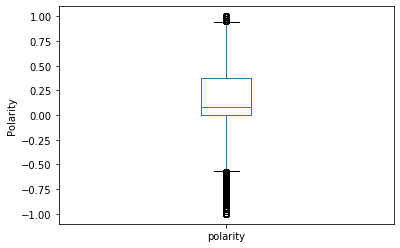

In [35]:
#print box graph of polarities
fig = plt.figure()
tweets['polarity'].plot(kind='box').set(ylabel='Polarity')
fig.savefig(imgdir + 'polarity_box.png')

Interesting. So the graph tells us that many of the outliers in the data are skewed left. This could also be determined since the median is greater than the mean. Now, I'd like to see how this compares to the polarity of the sample of random tweets. We'll use similar to code to do this:

,polarity
count,204820.000000
mean,0.118452
std,0.277684
min,-1.000000
25%,0.000000
50%,0.000000
75%,0.250000
max,1.000000


[Text(0, 0.5, 'Polarity')]

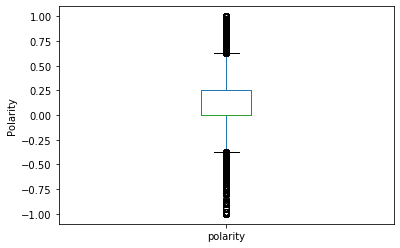

In [36]:
#show statistical information about the polarity
misc_pol.describe()

#create box graph
fig = plt.figure()
misc_pol['polarity'].plot(kind='box').set(ylabel='Polarity')
fig.savefig(imgdir + 'misc_polarity_box.png')

Interesting. According to this, the random sample had a *lower* average sentiment than the President. Because Donald Trump is so well-known for his negative usage of Twitter, this is definitely interesting. I would imagine that a big reason for this perception is simply that his more negative tweets get most of our attention, while the average ones fly under the radar.

Another interesting data point could be seen in his average tweet year, which was 2015.7 (which would be about mid-August that year). We can use the value counts of each year to show the spread:

In [37]:
#print year counts
tweets['year'].value_counts()

2019    7818
2013    7180
2015    6710
2014    5334
2016    3920
2018    3433
2012    3262
2020    3223
2017    2599
2011     763
2010     142
2009      56
Name: year, dtype: int64

And here is a graph that represents the data:

[Text(0, 0.5, 'Tweets')]

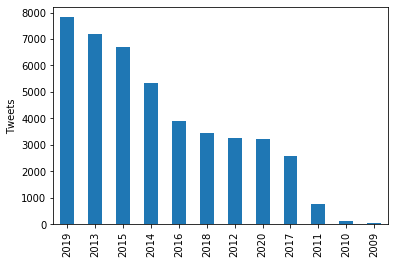

In [38]:
#print bar graph of year counts
fig = plt.figure()
tweets['year'].value_counts().plot(kind='bar').set(ylabel='Tweets')
fig.savefig(imgdir + 'tweets_year.png')

Here we can see that the majority of Trump's twitter volume comes from 2015 with 2014 and 2016 following at a distant second. This makes sense since Trump would've been the most active in spreading his ideas while he was running his first presidential campaign.

Next, we can investigate the averages of his retweets and likes:

In [39]:
#print average retweet count by year
tweets['retweet_count'].groupby(tweets['year']).mean()

year
2009       39.071429
2010       79.380282
2011      189.925295
2012      480.915696
2013      185.327577
2014      155.401950
2015      660.015201
2016     7736.217092
2017    18428.946518
2018    20030.042237
2019    16958.614351
2020    15977.236115
Name: retweet_count, dtype: float64

[Text(0, 0.5, 'Retweets')]

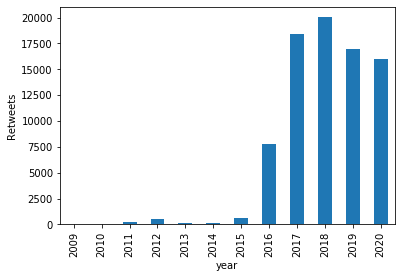

In [40]:
#print bar graph of retweet averages
fig = plt.figure()
tweets['retweet_count'].groupby(tweets['year']).mean().plot(kind='bar').set(ylabel='Retweets')
fig.savefig(imgdir + 'retweets_year.png')

In [41]:
#print average favorites by year
tweets['favorite_count'].groupby(tweets['year']).mean()

year
2009       50.089286
2010       64.676056
2011       74.560944
2012      248.188535
2013      128.933844
2014      167.889014
2015     1381.842474
2016    21437.738776
2017    73906.098499
2018    75990.821439
2019    52425.520849
2020    45810.165684
Name: favorite_count, dtype: float64

[Text(0, 0.5, 'Favorites')]

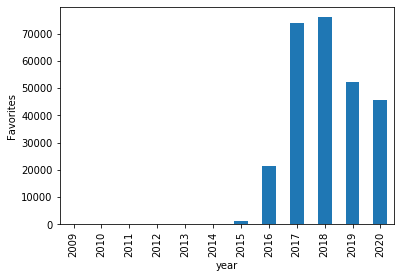

In [42]:
#print bar graph of favorite averages
fig = plt.figure()
tweets['favorite_count'].groupby(tweets['year']).mean().plot(kind='bar').set(ylabel='Favorites')
fig.savefig(imgdir + 'favorites_year.png')

We can also look at his most favorited/retweeted tweets:

In [43]:
tweets['retweet_count'].max()
tweets['favorite_count'].max()

369530.0

879647.0

The patterns we see between retweets and favorites over time are quite similar, which is to be expected of course. The data shows that Donald Trump's twitter became much more popular in 2016 (which is probably because it was the election year), but that 2017 was an exceptionally strong year for the growth of his online brand.

## Linguistic Analysis
In this section, we will primarily focus on the sentiment analysis of Donald Trump's Twitter. For this section, I've decided to look at his tweets from a year-to-year basis. First, we will look at his aggregated polarity by year, and then we can look at how each of the issues compares to his overall polarity:

In [44]:
#print average polarity by year
tweets['polarity'].groupby(tweets['year']).mean()

year
2009    0.166602
2010    0.341338
2011    0.106972
2012    0.152237
2013    0.199114
2014    0.229389
2015    0.212645
2016    0.136137
2017    0.158721
2018    0.167738
2019    0.120472
2020    0.120380
Name: polarity, dtype: float64

And here is another graph that shows this data:

[Text(0, 0.5, 'Polarity')]

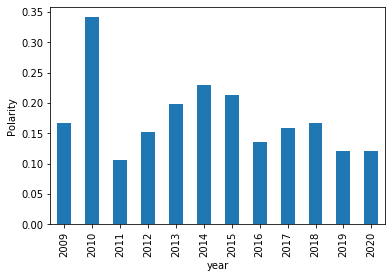

In [45]:
#show bar graph of average polarity
fig = plt.figure()
tweets['polarity'].groupby(tweets['year']).mean().plot(kind='bar').set(ylabel='Polarity')
fig.savefig(imgdir + 'polarity_year.png')

Trump, didn't tweet much in 2009 and 2010, but the graph shows that the tweets he did create had the highest average sentiment values. 2011 and 2012 showed the some rather low sentiment, but after a spike in 2013, his sentiment has been on a rather steady decline.

We can also do the same for the subgroups we made:

[Text(0, 0.5, 'Polarity')]

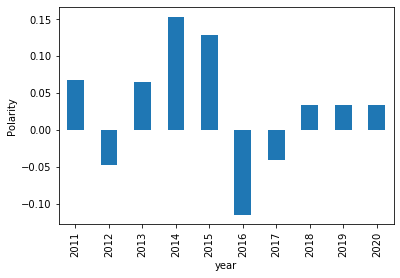

In [46]:
#show bar graph of average polarity for tweets pertaining to russia
fig = plt.figure()
tweets[russia]['polarity'].groupby(tweets['year']).mean().plot(kind='bar').set(ylabel='Polarity')
fig.savefig(imgdir + 'russia_polarity.png')

So it seems that Donald Trump began speaking about Russia much more negatively at the start of his election, though 2019 showed a rather large increase. This was probably because of the Mueller Report.

[Text(0, 0.5, 'Polarity')]

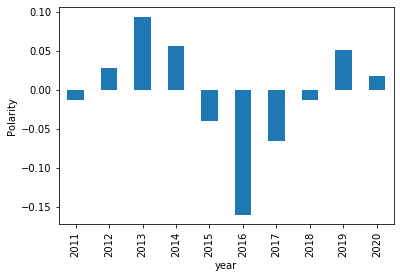

In [47]:
#show bar graph of average polarity for tweets pertaining to iran
fig = plt.figure()
tweets[iran]['polarity'].groupby(tweets['year']).mean().plot(kind='bar').set(ylabel='Polarity')
fig.savefig(imgdir + 'iran_polarity.png')

Trump always spoke relatively negatively about Iran, though 2019 was an outlier year. I would guess that 2019 simply did not have enough tweets about Iran to draw a more concrete conclusion, so we can check by seeing how many tweets were made that year:

In [48]:
#print number of tweets by year for iran subset
tweets[iran]['year'].value_counts()

2015    71
2020    67
2019    66
2013    58
2012    44
2018    37
2011    29
2014    22
2016    22
2017    21
Name: year, dtype: int64

Hmm... nine tweets is certainly not a lot, but it's definitely more than I was expecting. I would suspect that Trump simply didn't have on Iran on his "shitlist" (to put it bluntly) much in 2019, as much of the recent conflict there did not develop until January 2020.

[Text(0, 0.5, 'Polarity')]

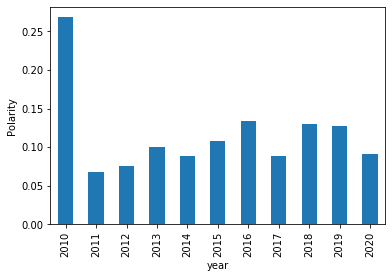

In [49]:
#show bar graph of average polarity for tweets pertaining to China
fig = plt.figure()
tweets[china]['polarity'].groupby(tweets['year']).mean().plot(kind='bar').set(ylabel='Polarity')
fig.savefig(imgdir + 'china_polarity.png')

Here we see that Trump has discussed China negatively for most of his Twitter lifespan, with 2010 being an outlier. I would suspect that there was simply not enough data in 2010 to make it such a strong outlier, so let's investigate that:

In [50]:
#print number of tweets by year for china subset
tweets[china]['year'].value_counts()

2019    462
2012    220
2018    217
2013    160
2015    152
2014    120
2020    109
2017    104
2016     88
2011     77
2010      1
Name: year, dtype: int64

Yes, there is only one tweet from 2010, and so the overall sentiment from that year cannot truely bbe represented.

Overall, I would say that much of this is to be expected, especially considering that Trump aligns himself with many values of the Republican Party. I would say the most shocking discovery can be seen in the chart corresponding to his sentiment towards Russia. Not only does it seem that Trump has flipped on his view towards them several times, the fact that he spoke more positively about them the same year as the Mueller Report came out is very interesting. I've gathered from this that Trump chooses his friends whenever it is of benefit for him, and drops them just as easily when convenient.

## Machine Learning

### Trump or Not Trump
Up until this point, we have simply explored and analyzed the contents of Trump's tweets and how he felt about certain nations using sentiment analysis. In this section, we will create a machine learning model that guesses whether or not a tweet was composed by Donald Trump. To do this, I will use a Multinomial Naive Bayes and use the dataframe that I created in the Data Processing section of the project. In this case, the tweet contents will be the predictor and the indicator code (T or NT) will be the predicted value.

I'll also make use of a GridSearchCV when making my pipeline. Not only will this allow me to create various folds that will ensure there are some biases within my training and testing splits, but I can test these splits on multiple different parameters within my pipeline.

Because we did this in Homework 4, the following code is adapted from that assignment.

First thing we will do is split the data from our machine learning dataframe into two separate series objects:

In [51]:
#create series from both df columns
text_data = both['text']
code_data = both['code']

Next we will create our pipeline. The pipeline uses a TfidfVectorizer to convert the text into word count representations and then normalize them. It then uses a MultinomialNB as the actual classifier.

In [52]:
#create the model pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfidf', TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')), ('mnb', MultinomialNB())])

Now I will define the parameters that I want the GridSearchCV to test:

In [53]:
#define the parameters
params = {
        'tfidf__max_features' : (1500, 3000, 4500, 9000),
        'mnb__alpha': (1e-2, 1e-3)
        }

I can now create the actual GridSearchCV object with 5 folds and fit it to the data:

In [54]:
#create the GridSearch object
from sklearn.model_selection import GridSearchCV 
search = GridSearchCV(pipe, params, cv=5, n_jobs=-1, return_train_score=True)

#fit the model
search.fit(text_data, code_data)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.5,
                                                        max_features=None,
                                                        min_df=2,
                                                        ngram_range=(1, 1),
                                         

And we can look at the scores with this code:

In [55]:
#view scores
from sklearn.metrics import confusion_matrix, accuracy_score
print("Best Results:")
print("Score:\n", search.best_score_)
print("Parameters:")
for param_name in sorted(params.keys()):
         print("%s: %r" % (param_name, search.best_params_[param_name]))
print("\nAll Results:")
results = pd.DataFrame(search.cv_results_)
print(results[['param_mnb__alpha', 'param_tfidf__max_features', 'mean_test_score']])

Best Results:
Score:
 0.9296214626975376
Parameters:
mnb__alpha: 0.01
tfidf__max_features: 9000

All Results:
  param_mnb__alpha param_tfidf__max_features  mean_test_score
0             0.01                      1500         0.906052
1             0.01                      3000         0.917273
2             0.01                      4500         0.922381
3             0.01                      9000         0.929621
4            0.001                      1500         0.906003
5            0.001                      3000         0.917138
6            0.001                      4500         0.922087
7            0.001                      9000         0.928972


There's a lot of information here, so we can begin our analysis with the best results. A score of about 93% is definitely significant, especially considering our baseline. I've determined that the absolute baseline would be 50% since half of the tweets were from Trump, so if a human were to do this--one who knew absolutely nothing about American politics--they could just guess and expect to be correct half the time.

The GridSearchCV predicted the model with four different tfidf parameters and two different mnb parameters, creating eight instances in total. By looking at the outputs, we can see that the accuracy increased as we increased the maximum number of features, but the accuracy was highest with an MultinomialNB alpha value of 0.01.

### Predicting Sentiment
In this model, we will try to predict the sentiment of Trump's tweets based on the text content. We will use the text column as the predictor and the polarity label as the target.

Because we already created the pipeline, we will just use the same one here. That being said, the first thing we will have to do is isolate our predictors and targets as separate series objects:

In [56]:
text_data2 = tweets['text']
label_data2 = tweets['polarity_label']

Next we will define our new set of parameters:

In [57]:
#define the parameters
params2 = {
        'tfidf__max_features' : (500, 1000, 1500),
        'mnb__alpha': (1e-2, 1e-3)
        }

And now we will create our GridSearchCV object and fit it to the data:

In [58]:
#create the GridSearch object
from sklearn.model_selection import GridSearchCV 
search2 = GridSearchCV(pipe, params2, cv=5, n_jobs=-1, return_train_score=True)

#fit the model
search2.fit(text_data2, label_data2)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tfidf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=0.5,
                                                        max_features=None,
                                                        min_df=2,
                                                        ngram_range=(1, 1),
                                         

In [59]:
#view scores
print("Best Results:")
print("Score:\n", search2.best_score_)
print("Parameters:")
for param_name in sorted(params2.keys()):
         print("%s: %r" % (param_name, search2.best_params_[param_name]))
print("\nAll Results:")
results2 = pd.DataFrame(search2.cv_results_)
print(results2[['param_mnb__alpha', 'param_tfidf__max_features', 'mean_test_score']])

Best Results:
Score:
 0.6958370837083708
Parameters:
mnb__alpha: 0.01
tfidf__max_features: 1500

All Results:
  param_mnb__alpha param_tfidf__max_features  mean_test_score
0             0.01                       500         0.687039
1             0.01                      1000         0.693789
2             0.01                      1500         0.695837
3            0.001                       500         0.687039
4            0.001                      1000         0.693812
5            0.001                      1500         0.695815


While not as shocking as 93%, 69.5% is still a pretty good return for the model, especially considering that the absolute baseline here was 25%. One change here that I found interesting was that, when I first ran this model, the parameters from the T or NT were used and 1500 max features yielded the highest accuracy. I wondered if fewer features would continue this trend, but as we can see, 1500 seems to be 

## Conclusion
The purpose of this project was to analyze the contents of Donald Trumps Twitter in order to draw conclusions about his tweeting habits and his attitude towards various nations and the stories relating to them. We also used his tweets along with a set of tweets from random users in order to create a machine learning model that predicts whether or not a tweet was composed by Trump.

#### Exploratory Analysis
In this section, we determined that Donald Trump's twitter influence and activity has been growing ever since he joined the platform. In terms of retweets and favorites, Trump's twitter influence increased drastically around the start of his election campaign, and the amount he tweeted also reflects this. I think the most important conclusion here was the stark contrast in the polarity of his tweets, or in other words, the number of outliers that were present. This indicates that Trump uses strong language to both endorse and condemn.

We also concluded that Trump's sentiment was higher on average than that of the random sample. While this could be shocking for a multitude of reasons, I think it is most likely because of our own bias to only focus on his most negative tweets. It is also important to consider that these random tweets are only from a two-day span in April 2016. It is probable that the current events of the time could have skewed the content of the tweets negatively, but unless I had gotten an even sample from every year (which would have been quite hard and, even a bit biased towards the outcome I was expecting), this would be a problem no matter when the data was gathered.

#### Linguistic Analysis
In this section, we used sentiment analysis to determine how positively or negatively Trump spoke about three different nations: Russia, Iran, and China. While most of this was expected, the bar graph corresponding to Russia was the most shocking. Donald Trump seemed to be taking the side of Russia up until his election campaign began, then his sentiment completely flipped in the span of a year. Additionally, the drastic increase in 2019 shows that Trump spoke more highly of Russia, which was conventiently during the same time as the Mueller Report... The biggest takeaway here is that Trump seems to use his Twitter influence and strong language to attack his foes and endorse his friends.

#### Machine Learning
Of all the sections in the project, I felt that this one yielded the most conclusive results. While the others could indicate a myriad of factors at play, this section showed that Trump has a very unique style of Tweeting. My original plan was to compare his Tweets to a single other person's such as Barack Obama or Hillary Clinton, I think being able to pick his tweets out of a larger crowd is much more interesting. While this could probably be done with many people to some degree--everyone has their own style of tweeting and preferred topics to tweet about--an accuracy of 93% is nonetheless quite significant.

For the second model, a max accuracy of about 70% is not as eye-catching, though considering the baseline here was 25%, it is definitely significant. For a human to do this especially, this would be a very difficult task, as at first glance, the polarity value can seem rather subjective. Because the machine can compare the value counts of the word vectors, I would say that this is more so a commentary on the effectiveness of TextBlob.

#### Final Thoughts
The most important thing to take away from this project is that politicians have a lot of online influence, and they use this influence to persuade their followers to behave in a certain way. For the rest of us, when we send a tweet, we are not directly affecting anybody. For someone like Trump who is in a powerful political position, what he says and does on Twitter can have a tangible impact on Americans. It is important for us to be aware of this influence and always check those who are in power, because no matter who you are, we are all subject to the 240 character limit.